In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV



In [44]:
url='https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df=pd.read_csv(url)
df.shape

(768, 9)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [46]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Quitar ceros de glucose, blood pressure, skinthickness, insulin and bmi.

In [47]:
df = df[(df['Glucose'] > 0) & (df['BloodPressure'] > 0) & (df['SkinThickness'] > 0) & (df['Insulin'] > 0)& (df['BMI'] > 0)]
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [48]:
df['Outcome'].value_counts()

0    262
1    130
Name: Outcome, dtype: int64

In [49]:
df[df['Pregnancies']>11]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
28,13,145,82,19,110,22.2,0.245,57,0
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
215,12,151,70,40,271,41.8,0.742,38,1
254,12,92,62,7,258,27.6,0.926,44,1
298,14,100,78,25,184,36.6,0.412,46,1
323,13,152,90,33,29,26.8,0.731,43,1
358,12,88,74,40,54,35.3,0.378,48,0
375,12,140,82,43,325,39.2,0.528,58,1
744,13,153,88,37,140,40.6,1.174,39,0


In [60]:
df['Outcome'].value_counts()

0    262
1    130
Name: Outcome, dtype: int64

<AxesSubplot:>

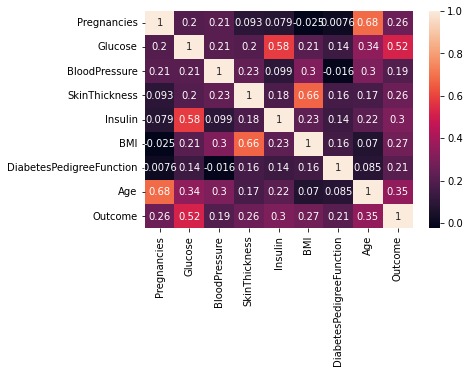

In [50]:
sns.heatmap(df.corr(),annot=True)

Como pregnancies está muy correlacionada con la edad la sacamos.

In [51]:
df=df.drop('Pregnancies',axis=1)

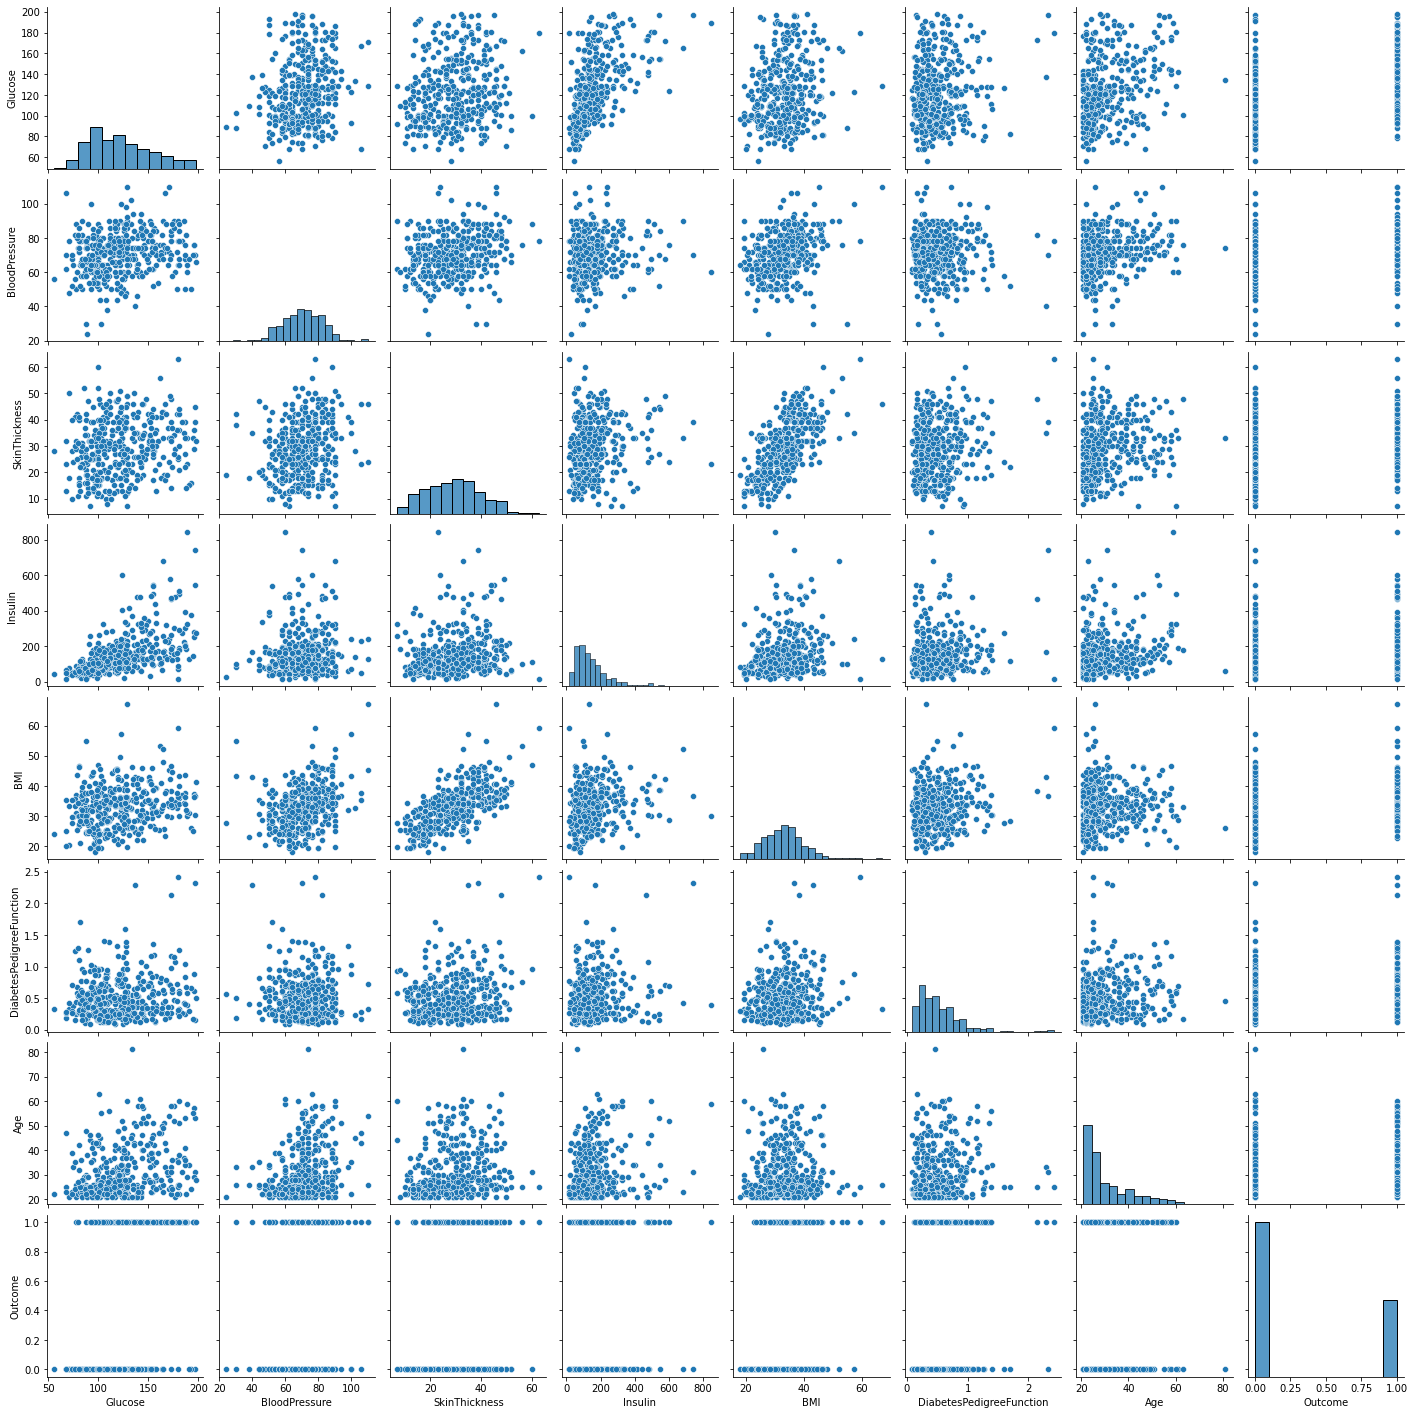

In [52]:
sns.pairplot(df)

In [62]:
scale= StandardScaler()
 
# separate the independent and dependent variables
# standardization of dependent variables
df_st = scale.fit_transform(df) 
df_st=pd.DataFrame(df_st)
df_st.columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction','Age', 'Outcome']

df_st

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299,-0.704403
1,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585,1.419642
2,-1.447941,-1.655691,0.271788,-0.573394,-0.297238,-0.797126,-0.477514,1.419642
3,2.413014,-0.053146,1.509530,3.260122,-0.368477,-1.057960,2.172726,1.419642
4,2.153454,-0.854419,-0.585110,5.812990,-0.425468,-0.362402,2.761668,1.419642
...,...,...,...,...,...,...,...,...
387,1.893894,1.389146,1.414319,2.982087,1.455225,-0.872478,-0.477514,1.419642
388,0.174309,1.389146,0.938264,-0.388037,0.486384,1.547482,0.602213,1.419642
389,-1.123491,-1.014673,-0.299477,-1.180016,-0.667678,0.704119,-0.870142,-0.704403
390,-0.701706,0.427618,1.795162,0.201735,-0.026533,-1.020284,3.154296,-0.704403


In [65]:
x=df_st.drop('Outcome',axis=1)
y=df['Outcome']
X_train, X_test, y_train, y_test=train_test_split(x,y,stratify=y,random_state=34)

In [66]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)

clf.fit(X_train, y_train)
print('Accuracy:',clf.score(X_test, y_test))

Accuracy: 0.673469387755102


In [71]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4,5]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params,cv=3)
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4, 5]})

In [72]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=2, random_state=42)

In [73]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=42,max_leaf_nodes=2)
##por que no me aparece el min_sample_split

clf.fit(X_train, y_train)
print('Accuracy:',clf.score(X_test, y_test))

Accuracy: 0.7448979591836735


In [74]:
clf_pred=clf.predict(X_test)

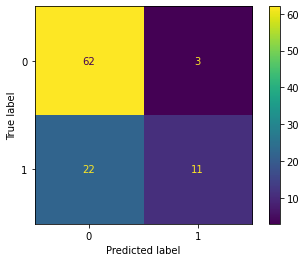

In [75]:
cm = confusion_matrix(y_test, clf_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=clf.classes_)
disp.plot()

plt.show()

In [76]:
print(classification_report(y_test,clf_pred))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83        65
           1       0.79      0.33      0.47        33

    accuracy                           0.74        98
   macro avg       0.76      0.64      0.65        98
weighted avg       0.75      0.74      0.71        98

